In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
# Load data (assuming the CSV file formating is exactly as it was downloaded from 
# Byteflies Cloud and the files are sitting in the same directory as your script or notebook)
acc = pd.read_csv("./Input-BTFEY2JTH/KRHXKXA-BTFEY2JTH-20201007-20201008/2020-10-07-172337309_caff24bc-6377-e69c-a774-13ea9bc2bb54_ACC.csv", names=["time", "x", "y", "z"], skiprows=1)
gyr = pd.read_csv("./Input-BTFEY2JTH/KRHXKXA-BTFEY2JTH-20201007-20201008/2020-10-07-172337309_caff24bc-6377-e69c-a774-13ea9bc2bb54_GYR.csv", names=["time", "x", "y", "z"], skiprows=1)

In [22]:
acc.head()

,time,x,y,z
0,0.197571,1242,-2774,-1658
1,0.207571,1245,-2713,-1410
2,0.217571,1416,-3139,-1332
3,0.227571,1501,-3625,-1291
4,0.237571,1224,-3731,-1471


In [23]:
gyr.head()

,time,x,y,z
0,0.207611,1619,-881,422
1,0.217611,1685,-813,333
2,0.227611,1892,-486,8
3,0.237611,1927,-408,-233
4,0.247611,1315,-635,-151


In [24]:
# Get the start timestamp for the Recording from the Recording detail page on the 
# Byteflies files and fill it out below (YYYY,MM,DD,HH,MM,SS,uS) [uS = microseconds, 
# i.e. File milliseconds * 1000] 
start_dt = datetime(2020,10,7,17,23,37,309)
start_ts = start_dt.timestamp()

In [25]:
# Convert Signals to correct unit (note that this is a linear transformation and thus
# not strictly necessary)
acc_list = acc.keys()
gyr_list = gyr.keys()

In [26]:
for i in range(len(acc_list)-1):
    acc[acc_list[i+1]] *= 0.0002  # To g

for i in range(len(gyr_list)-1):
    gyr[gyr_list[i+1]] *= 0.0305  # To s

In [27]:
# Convert the time values in seconds to a datetime index for easier plotting and Signal comparison
t_ns_gyr = (start_ts + gyr["time"])*1e9
gyr.index = t_ns_gyr.astype("datetime64[ns]")
gyr.drop(["time"], axis=1, inplace=True)

t_ns_acc = (start_ts + acc["time"])*1e9 
acc.index = t_ns_acc.astype("datetime64[ns]")
acc.drop(["time"], axis=1, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


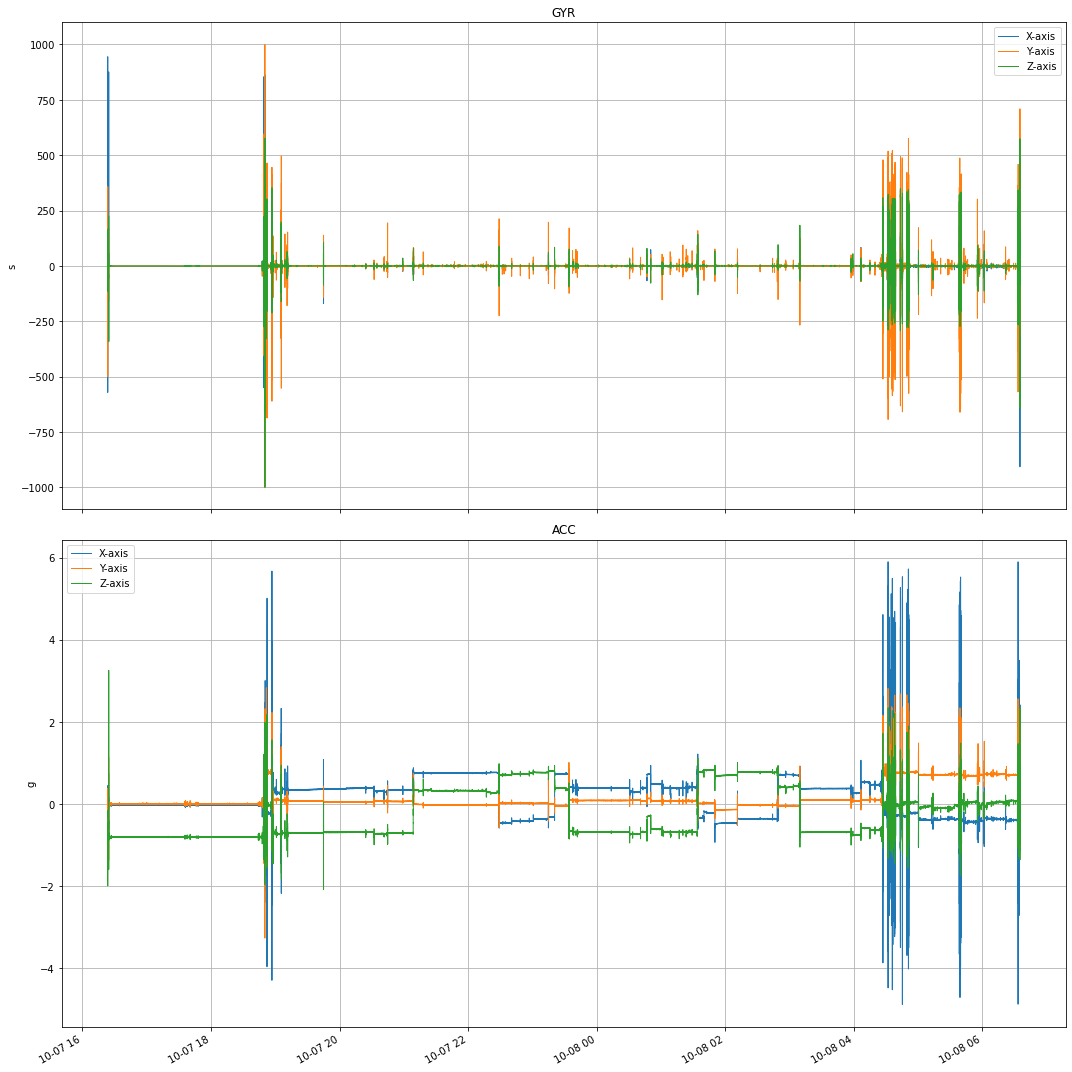

In [28]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize=(15,15))
ax1.plot(gyr, lw=1)
ax1.grid()
ax1.set_title("GYR")
ax1.set_ylabel("s")
ax1.legend(loc="best")
ax1.legend(["X-axis", "Y-axis", "Z-axis"], loc="best")

ax2.plot(acc, lw=1)
ax2.grid()
ax2.set_title("ACC")
ax2.set_ylabel("g")
ax2.legend(loc="best")
ax2.legend(["X-axis", "Y-axis", "Z-axis"], loc="best")

fig.autofmt_xdate()
plt.show()


3 channels is perfectly normal for an ACC or GYR signal (as there are 3 axes to get data from).
For the biopotential signals (EEG, ECG, EMG, EOG); you can activate 1 biopotential channel  (if only 2 electrodes are used) or 2 biopotential channels (if 4 electrodes are used). This can be configured in configuration mode. 
